<div style="text-align:center;">
    <img src="./Downloads/Scenario2.png"/>
</div>
<!-- 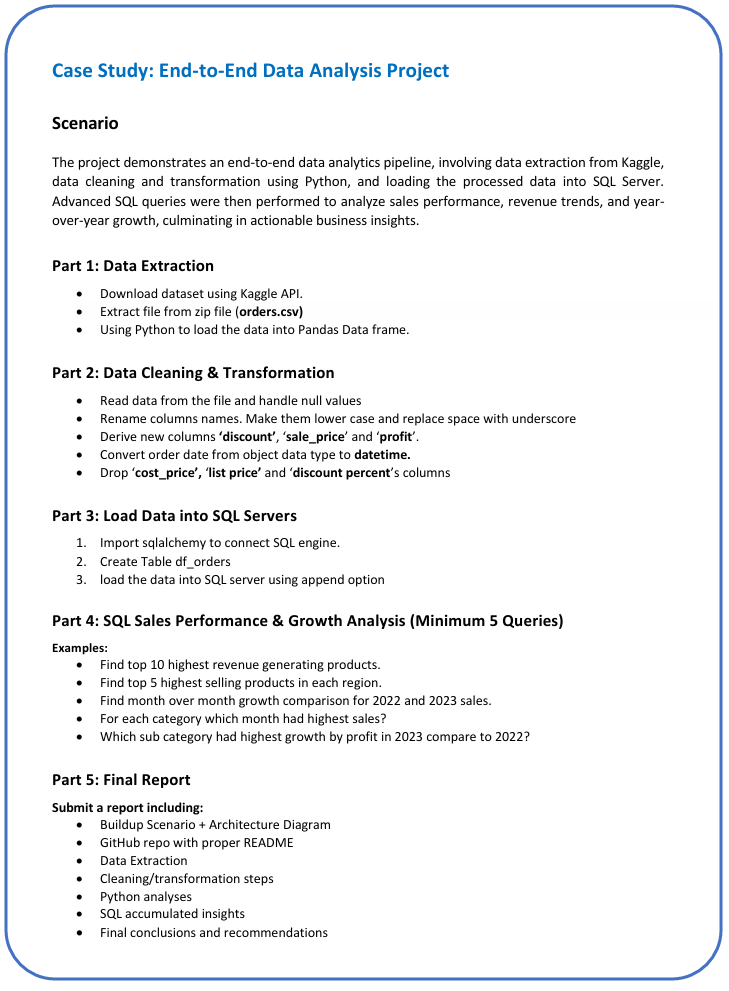 -->

<div style="text-align:center;">
    <img src="./Downloads/Scene1.png" width="500"/>
</div>

<h3 style="color:green">PART 1: DATA EXTRACTION</h3>

In [1]:
# import libraries
# !pip install kaggle
import kaggle

<h3 style="color:blue;">- download dataset using kaggle api</h3>

In [2]:
!kaggle datasets download ankitbansal06/retail-orders -f orders.csv

Dataset URL: https://www.kaggle.com/datasets/ankitbansal06/retail-orders
License(s): CC0-1.0
orders.csv.zip: Skipping, found more recently modified local copy (use --force to force download)


<h3 style="color:blue">- extract file from zip file</h3>

In [3]:
import zipfile
zip_ref = zipfile.ZipFile('orders.csv.zip') 
zip_ref.extractall()            # extract file to dir
zip_ref.close()                 # close file

<h3 style="color:blue">- read data from the file</h3>

In [4]:
import pandas as pd
df = pd.read_csv('./datasets/orders.csv')
df.head(10)

,Order Id,Order Date,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub Category,Product Id,cost price,List Price,Quantity,Discount Percent
0,1,2023-03-01,Second Class,Consumer,United States,Henderson,Kentucky,42420.0,South,Furniture,Bookcases,FUR-BO-10001798,240.0,260.0,2.0,2.0
1,2,2023-08-15,Second Class,Consumer,United States,Henderson,Kentucky,42420.0,South,Furniture,Chairs,FUR-CH-10000454,600.0,730.0,3.0,3.0
2,3,2023-01-10,Second Class,Corporate,United States,Los Angeles,California,90036.0,West,Office Supplies,Labels,OFF-LA-10000240,10.0,10.0,2.0,5.0
3,4,2022-06-18,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,Furniture,Tables,FUR-TA-10000577,780.0,960.0,5.0,2.0
4,5,2022-07-13,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,Office Supplies,Storage,OFF-ST-10000760,20.0,20.0,2.0,5.0
5,6,2022-03-13,Not Available,Consumer,United States,Los Angeles,California,90032.0,West,Furniture,Furnishings,FUR-FU-10001487,50.0,50.0,7.0,3.0
6,7,2022-12-28,Standard Class,Consumer,United States,Los Angeles,California,90032.0,West,Office Supplies,Art,OFF-AR-10002833,10.0,10.0,4.0,3.0
7,8,2022-01-25,Standard Class,Consumer,United States,Los Angeles,California,90032.0,West,Technology,Phones,TEC-PH-10002275,860.0,910.0,6.0,5.0
8,9,2023-03-23,Not Available,Consumer,United States,Los Angeles,California,90032.0,West,Office Supplies,Binders,OFF-BI-10003910,20.0,20.0,3.0,2.0
9,10,2023-05-16,Standard Class,Consumer,United States,Los Angeles,California,90032.0,West,Office Supplies,Appliances,OFF-AP-10002892,90.0,110.0,5.0,3.0


<h3 style="color:green">PART 2: DATA CLEANING & TRANSFORMATION</h3>

In [5]:
#in 'Ship Mode' there are 'Not Available' & 'unknown' values, so we have to fix these values to 'nan' (bcz in pandas they are represented as nan)

df['Ship Mode'].unique()

array(['Second Class', 'Standard Class', 'Not Available', 'unknown',
       'First Class', nan, 'Same Day'], dtype=object)

In [6]:
df = pd.read_csv('./datasets/orders.csv',na_values=['Not Available','unknown'])
df['Ship Mode'].unique()

array(['Second Class', 'Standard Class', nan, 'First Class', 'Same Day'],
      dtype=object)

In [7]:
# In this dataframe, the column names must be in lowercase and covered the space by placing underscore.
# df.rename(columns={'Order Id': 'order_id', 'City': 'city'})        #this renames only 2 columns

df.columns = df.columns.str.lower()
df.head(4)

,order id,order date,ship mode,segment,country,city,state,postal code,region,category,sub category,product id,cost price,list price,quantity,discount percent
0,1,2023-03-01,Second Class,Consumer,United States,Henderson,Kentucky,42420.0,South,Furniture,Bookcases,FUR-BO-10001798,240.0,260.0,2.0,2.0
1,2,2023-08-15,Second Class,Consumer,United States,Henderson,Kentucky,42420.0,South,Furniture,Chairs,FUR-CH-10000454,600.0,730.0,3.0,3.0
2,3,2023-01-10,Second Class,Corporate,United States,Los Angeles,California,90036.0,West,Office Supplies,Labels,OFF-LA-10000240,10.0,10.0,2.0,5.0
3,4,2022-06-18,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,Furniture,Tables,FUR-TA-10000577,780.0,960.0,5.0,2.0


In [8]:
df.columns = df.columns.str.replace(' ','_')
df.head(4)

,order_id,order_date,ship_mode,segment,country,city,state,postal_code,region,category,sub_category,product_id,cost_price,list_price,quantity,discount_percent
0,1,2023-03-01,Second Class,Consumer,United States,Henderson,Kentucky,42420.0,South,Furniture,Bookcases,FUR-BO-10001798,240.0,260.0,2.0,2.0
1,2,2023-08-15,Second Class,Consumer,United States,Henderson,Kentucky,42420.0,South,Furniture,Chairs,FUR-CH-10000454,600.0,730.0,3.0,3.0
2,3,2023-01-10,Second Class,Corporate,United States,Los Angeles,California,90036.0,West,Office Supplies,Labels,OFF-LA-10000240,10.0,10.0,2.0,5.0
3,4,2022-06-18,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,Furniture,Tables,FUR-TA-10000577,780.0,960.0,5.0,2.0


In [9]:
#derive new columns discount , sale price and profit

df['discount']=df['list_price']*df['discount_percent']*.01
df['sale_price']= df['list_price']-df['discount']
df['profit']=df['sale_price']-df['cost_price']
df.head(4)

,order_id,order_date,ship_mode,segment,country,city,state,postal_code,region,category,sub_category,product_id,cost_price,list_price,quantity,discount_percent,discount,sale_price,profit
0,1,2023-03-01,Second Class,Consumer,United States,Henderson,Kentucky,42420.0,South,Furniture,Bookcases,FUR-BO-10001798,240.0,260.0,2.0,2.0,5.2,254.8,14.8
1,2,2023-08-15,Second Class,Consumer,United States,Henderson,Kentucky,42420.0,South,Furniture,Chairs,FUR-CH-10000454,600.0,730.0,3.0,3.0,21.9,708.1,108.1
2,3,2023-01-10,Second Class,Corporate,United States,Los Angeles,California,90036.0,West,Office Supplies,Labels,OFF-LA-10000240,10.0,10.0,2.0,5.0,0.5,9.5,-0.5
3,4,2022-06-18,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,Furniture,Tables,FUR-TA-10000577,780.0,960.0,5.0,2.0,19.2,940.8,160.8


In [10]:
#convert order date from object data type to datetime

df.dtypes

order_id              int64
order_date           object
ship_mode            object
segment              object
country              object
city                 object
state                object
postal_code         float64
region               object
category             object
sub_category         object
product_id           object
cost_price          float64
list_price          float64
quantity            float64
discount_percent    float64
discount            float64
sale_price          float64
profit              float64
dtype: object

In [11]:
df['order_date']=pd.to_datetime(df['order_date'],format="%Y-%m-%d")
df.dtypes

order_id                     int64
order_date          datetime64[ns]
ship_mode                   object
segment                     object
country                     object
city                        object
state                       object
postal_code                float64
region                      object
category                    object
sub_category                object
product_id                  object
cost_price                 float64
list_price                 float64
quantity                   float64
discount_percent           float64
discount                   float64
sale_price                 float64
profit                     float64
dtype: object

In [12]:
#drop cost price list price and discount percent columns

df.drop(columns=['list_price','cost_price','discount_percent'],inplace=True)
df.head(4)

,order_id,order_date,ship_mode,segment,country,city,state,postal_code,region,category,sub_category,product_id,quantity,discount,sale_price,profit
0,1,2023-03-01,Second Class,Consumer,United States,Henderson,Kentucky,42420.0,South,Furniture,Bookcases,FUR-BO-10001798,2.0,5.2,254.8,14.8
1,2,2023-08-15,Second Class,Consumer,United States,Henderson,Kentucky,42420.0,South,Furniture,Chairs,FUR-CH-10000454,3.0,21.9,708.1,108.1
2,3,2023-01-10,Second Class,Corporate,United States,Los Angeles,California,90036.0,West,Office Supplies,Labels,OFF-LA-10000240,2.0,0.5,9.5,-0.5
3,4,2022-06-18,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,Furniture,Tables,FUR-TA-10000577,5.0,19.2,940.8,160.8


<h3 style="color:green">PART 3: LOAD DATA INTO SQL SERVERS</h3>

In [13]:
#load the data into sql server using replace option

import sqlalchemy as sal
engine = sal.create_engine('mssql://Sohail/master?driver=ODBC+DRIVER+17+FOR+SQL+SERVER')
conn=engine.connect()

In [14]:
df.to_sql('df_orders', con=conn , index=False, if_exists = 'replace')

43

In [15]:
len(df)

7772

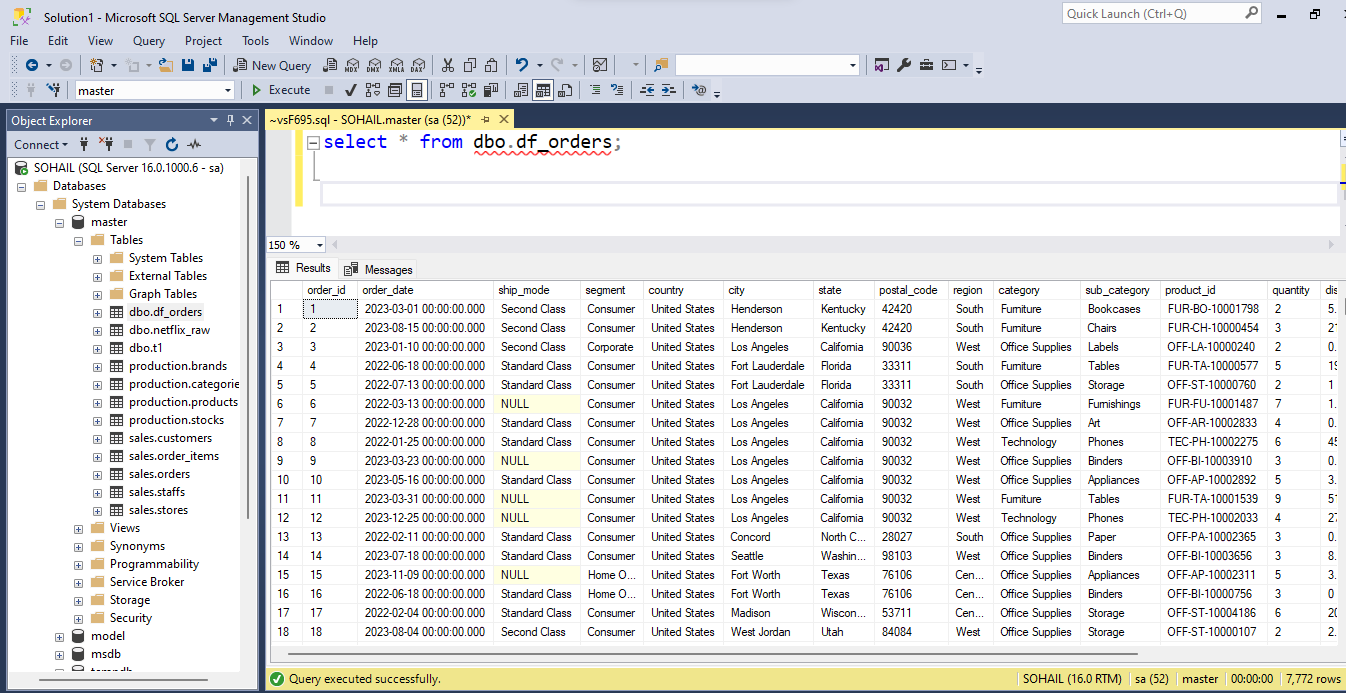

- While creating a table, the best practice is don't use this option <strong>if_exists = ‘replace’</strong> because the pandas will create a table with highest possible data types. So we should create the table ourself by modify it as <strong>if_exists = ‘append’</strong> which means it will append the data into the table.


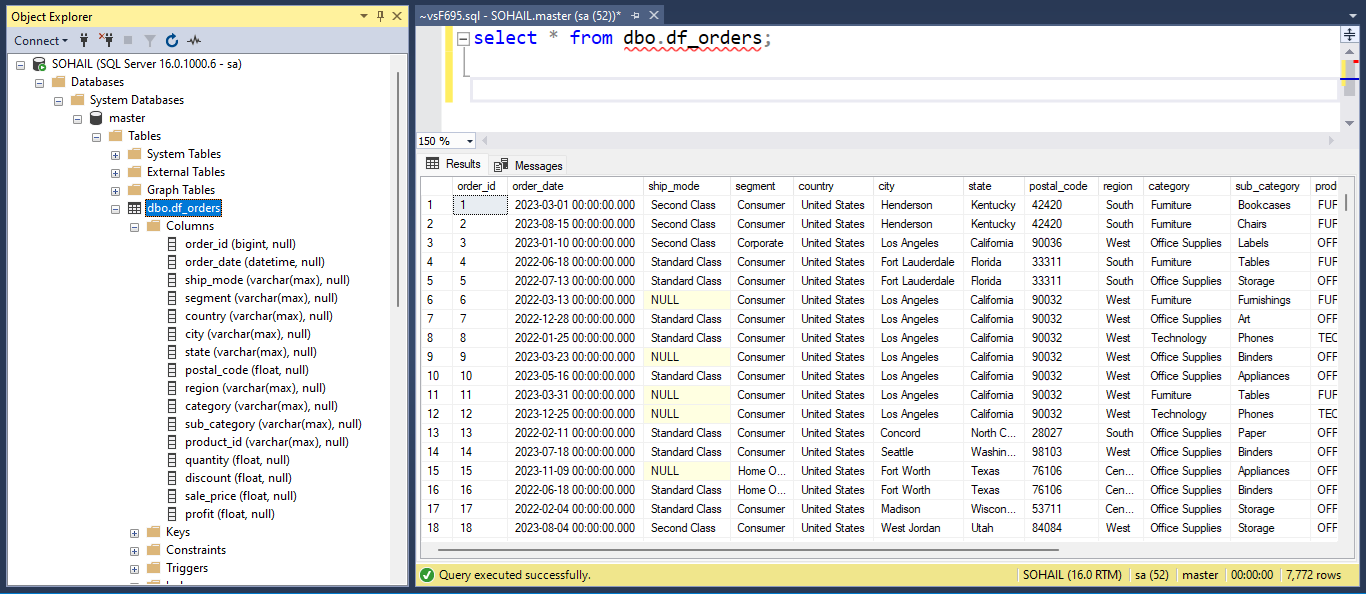

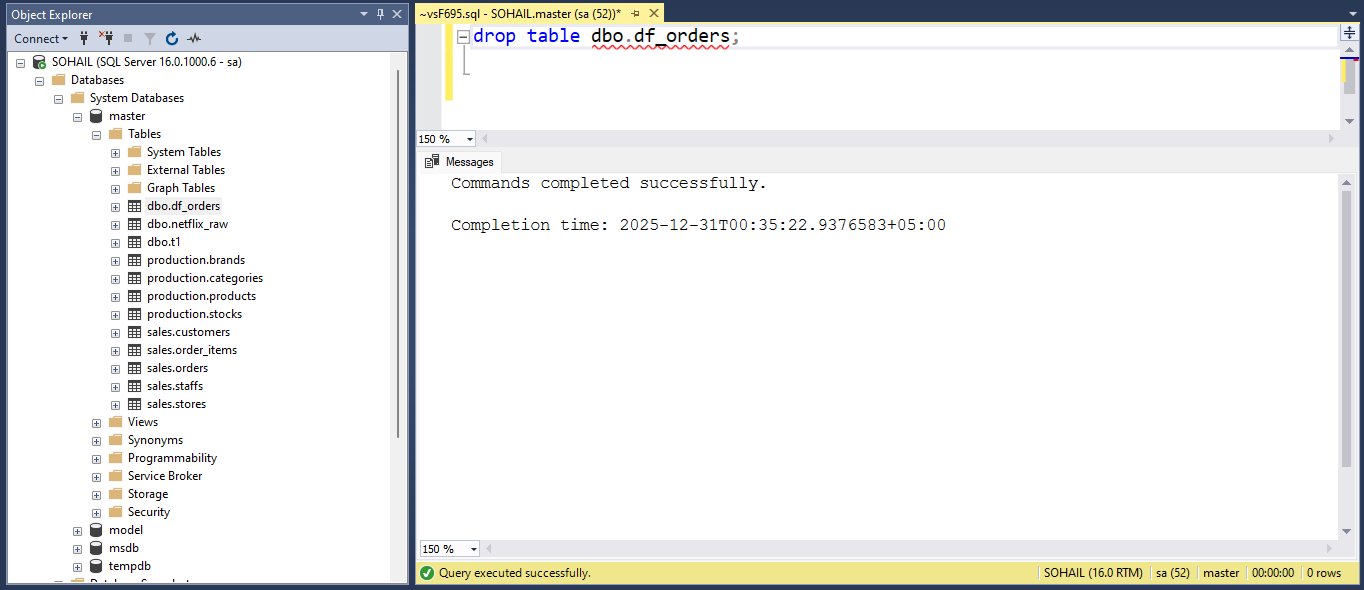

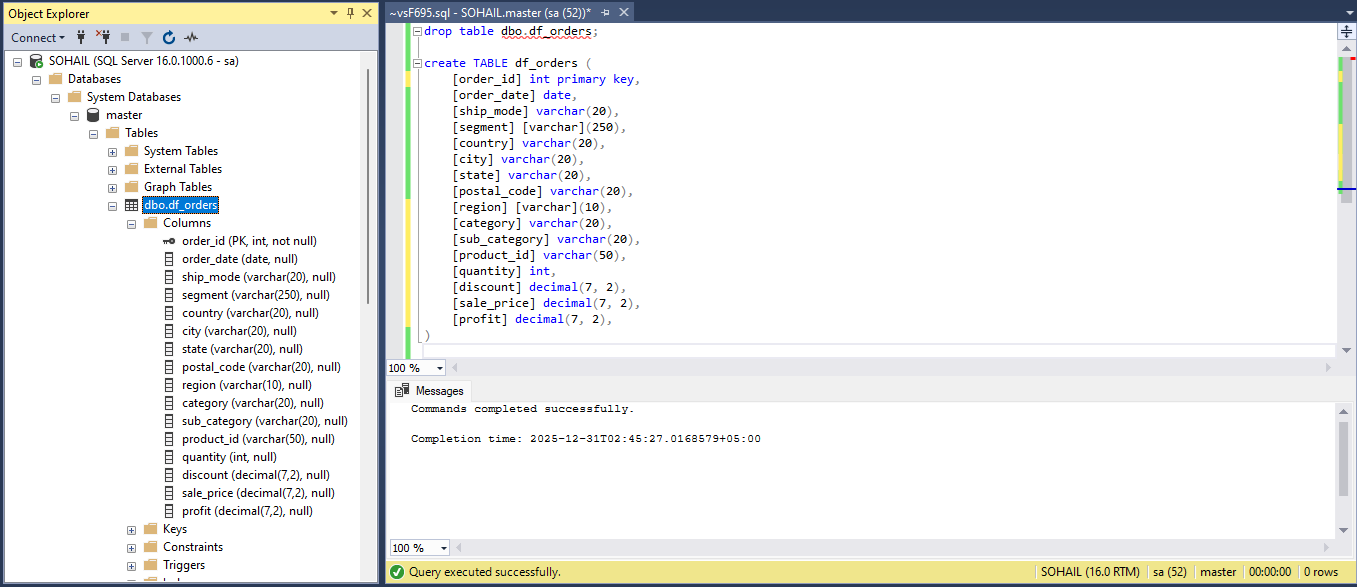

In [20]:
#load the data into sql server using append option

df.to_sql('df_orders', con=conn , index=False, if_exists = 'append')

43

In [21]:
len(df.columns)

16

<h3 style = "color: green">PART 4: SQL SALES PERFORMANCE & GROWTH ANALYSIS </h3>


### **1) Problem Statement:**

Identify the **top 10 products** that generate the **highest total revenue**.

### **Given Data:**

* **Table Name:** `df_orders`
* **Columns Used:**

  * `product_id` → Unique identifier of each product
  * `sale_price` → Selling price per order transaction

Each record represents an individual sales transaction.

### **Required Output:**

* `product_id`
* Total revenue (`sales`) generated by each product
* Only the **top 10 products** ranked by highest revenue

### **Approach / Logic:**

1. Group all sales records by `product_id`
2. Calculate total revenue using `SUM(sale_price)`
3. Sort products by total revenue in descending order
4. Select only the top 10 revenue-generating products

### **SQL Query:**


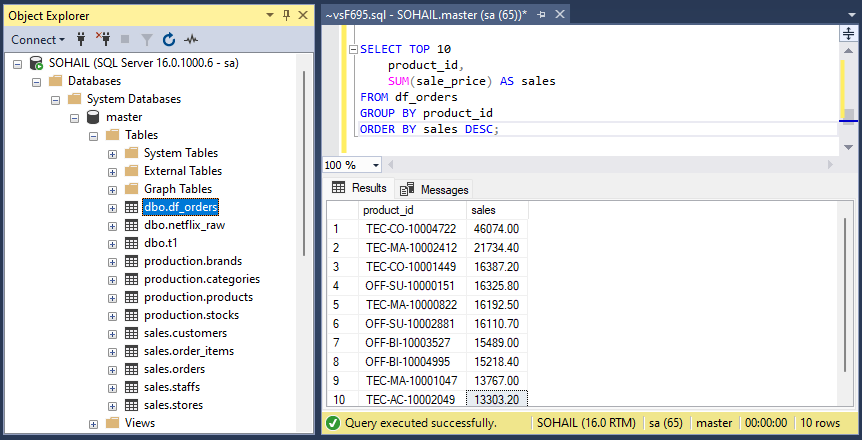

### **2) Problem Statement:**

Find the **top 5 highest-selling products in each region** based on total sales revenue.

### **Given Data:**

* **Table Name:** `df_orders`
* **Columns Used:**

  * `region` → Geographic sales region
  * `product_id` → Unique identifier of each product
  * `sale_price` → Selling price per order transaction

Each row represents a **single product sale** in a specific region.

### **Required Output:**

For **each region**:

* `region`
* `product_id`
* Total sales revenue (`sales`)
* Only the **top 5 products** ranked by highest sales

### **Approach / Logic:**

1. Aggregate total sales by **region and product** using `SUM(sale_price)`
2. Use a **CTE** to store the aggregated results
3. Apply `ROW_NUMBER()` with `PARTITION BY region` to rank products within each region
4. Order products by sales in descending order
5. Filter results to return only products ranked **1 to 5** per region

### **SQL Query:**


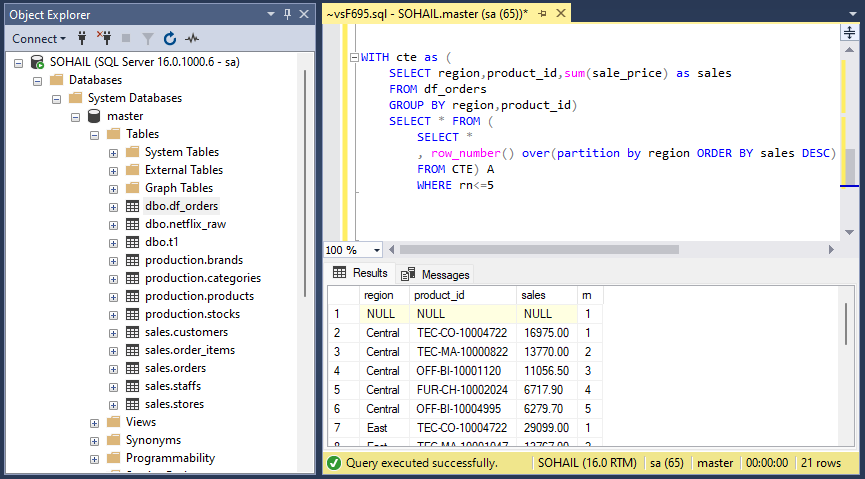

### **3) Problem Statement:**

Perform a **month-over-month sales comparison** between the years **2022 and 2023** (e.g., January 2022 vs January 2023).

### **Given Data:**

* **Table Name:** `df_orders`
* **Columns Used:**

  * `order_date` → Date when the order was placed
  * `sale_price` → Sales value per order transaction

Each record represents an individual sales transaction with a specific order date.

### **Required Output:**

For each month:

* Month number (`order_month`)
* Total sales for **2022** (`sales_2022`)
* Total sales for **2023** (`sales_2023`)

This allows direct month-wise comparison across the two years.

### **Approach / Logic:**

1. Extract **year** and **month** from `order_date`
2. Aggregate total sales per month and year using `SUM(sale_price)`
3. Store aggregated results in a **CTE**
4. Use conditional aggregation (`CASE WHEN`) to separate sales for 2022 and 2023
5. Group results by month and sort them in chronological order

### **SQL Query:**


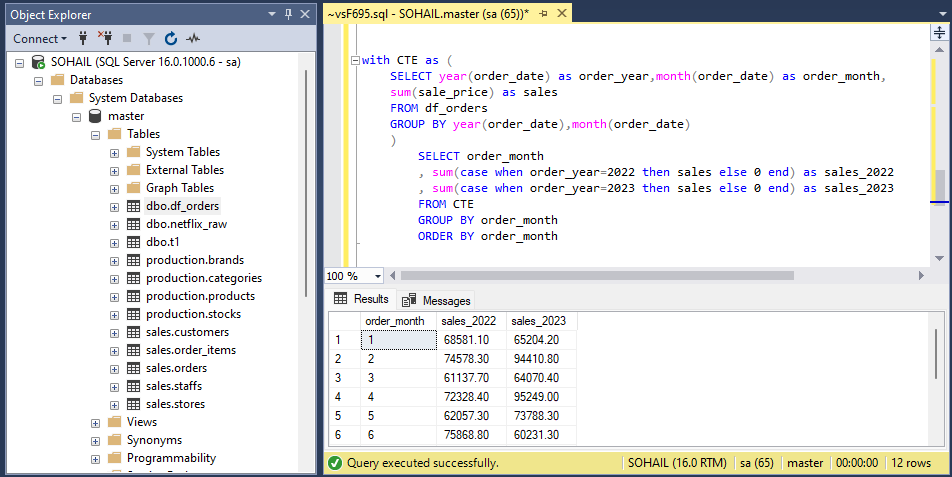

### **4) Problem Statement:**

Determine **which month recorded the highest sales for each product category**.

### **Given Data:**

* **Table Name:** `df_orders`
* **Columns Used:**

  * `category` → Product category
  * `order_date` → Date when the order was placed
  * `sale_price` → Sales value per transaction

Each record represents a sales transaction for a product belonging to a specific category.

### **Required Output:**

For **each category**:

* Category name (`category`)
* Month (formatted as `yyyyMM`)
* Total sales (`sales`) for that month

Only the **highest-selling month** per category is required.

### **Approach / Logic:**

1. Group sales data by **category and year–month** extracted from `order_date`
2. Calculate total sales using `SUM(sale_price)`
3. Store aggregated results in a **CTE**
4. Rank months within each category based on sales in descending order
5. Select the top-ranked month (`rn = 1`) for each category

### **SQL Query:**


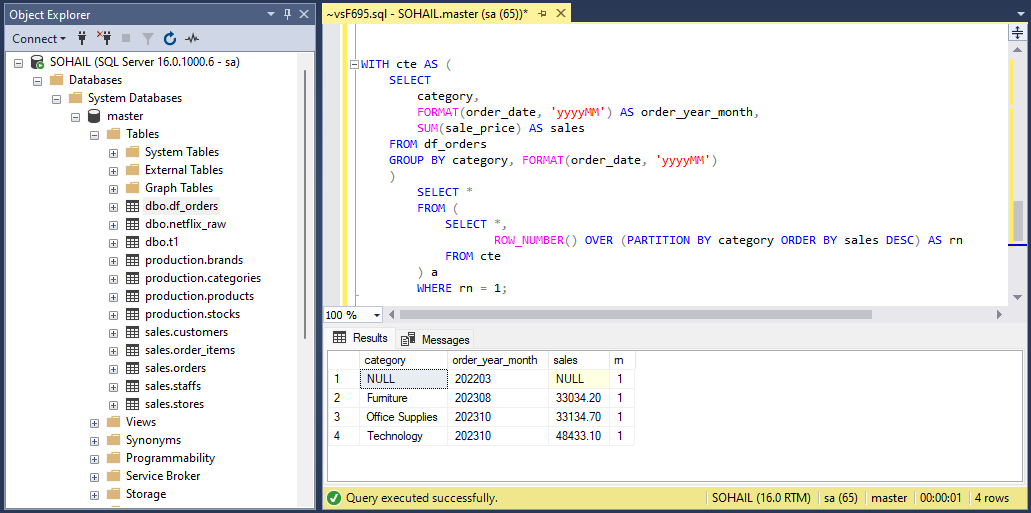

### **5) Problem Statement:**

Identify the **sub-category** that achieved the **highest profit growth** in **2023 compared to 2022**.

### **Given Data:**

* **Table Name:** `df_orders`
* **Columns Used:**

  * `sub_category` → Product sub-category
  * `order_date` → Date when the order was placed
  * `sale_price` → Sales value per transaction

Each record represents an individual sales transaction for a specific sub-category.

### **Required Output:**

* `sub_category`
* Total sales in **2022** (`sales_2022`)
* Total sales in **2023** (`sales_2023`)
* **Growth value** (`sales_2023 - sales_2022`)

Only the **top sub-category** with the highest growth is required.

### **Approach / Logic:**

1. Aggregate total sales by **sub-category and year**
2. Store yearly sales data in the first **CTE**
3. Use conditional aggregation to separate **2022** and **2023** sales
4. Calculate the **year-over-year growth** by subtracting 2022 sales from 2023 sales
5. Sort sub-categories by growth in descending order
6. Select the top-performing sub-category


### **SQL Query:**


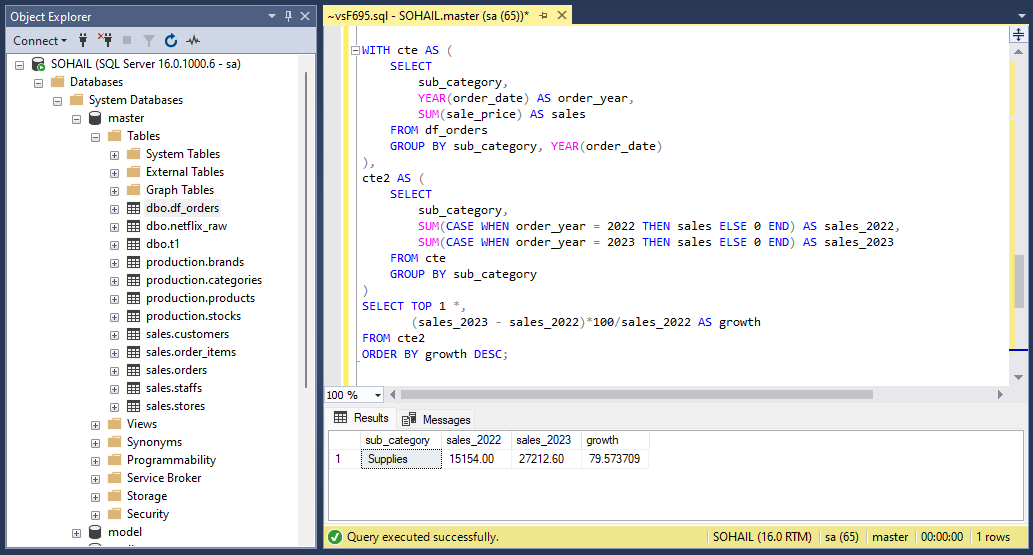

### Final conclusions and recommendations
The end-to-end analytics pipeline successfully transformed raw sales data into reliable, query-ready insights, revealing key revenue drivers, regional performance patterns, and year-over-year growth trends.
It is recommended that the business focus on high-performing products and fast-growing sub-categories, while leveraging monthly trend analysis to optimize pricing, promotions, and regional sales strategies.